# Assignment 2

In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt

class Dialogue:
    
    def __init__(self, filename):
        """
        Initialise the instance variables
        Args:
            1. filename (string): Name of script file to read
        """
        self.filename = filename
        self.script = []
    
    def extract(self):
        """
        Remove all the meta-data from the script and only keep character and their dialogue separated by a colon (:)
        Returns:
            1. List: contains list of tuple of strings for each dialogue spoken by each character
        """
        index = 0
        #read the file and add each line that contains ':' to denote character speech into a list 
        self.script = [line for line in open(self.filename, encoding = 'utf-8').read().splitlines() if ':' in line]
        #remove meta-data present before the dialogues begin
        while ']' not in self.script[index]: 
            self.script.pop(index) #find the first ']' denoting the last meta-data character before actual dialogue begins
        #remove meta-data denoted by '[]', i.e, start of a scene in the script
        for line in self.script:
            if line.startswith('['):  #check if line begins with '[' character
                self.script.remove(line)

        #removal of meta-data denoted inside '()'
        pattern = "\(.*?\)"
        i = 0
        for i in range(len(self.script)):
            #replace meta-data with blanks
            self.script[i] = re.sub(pattern, "", self.script[i])
            #replace more than 1 consecutive spaces with single space
            self.script[i] = re.sub(" +", " ", self.script[i])
            #split the strings in the list into tuples
            self.script[i] = tuple(self.script[i].split(": "))
        
        with open("32313152_clean_dialogue.txt", 'w', encoding = 'utf-8') as f_write:
            print(self.script, file = f_write)  # print the list into the file
        
        return self.script
    
    def separate(self):
        """
        Create separate file of dialogues spoken by each character in the script
        """
        character = set()
        for line in self.extract():
            character.add(line[0].lower())  # get all the characters in the script
        
        for char in character:
            f_char = open(f"32313152_{char}.txt", 'w', encoding = 'utf-8')  #create a file for each character
            for line in self.script:
                if line[0].lower() == char:
                    print(line[1], file = f_char)
            f_char.close()
        
    def getScript(self):
        """
        Method to return the script of the file
        Returns:
            1. List: list of tuples containing the name and dialogue of the characters in the file
        """
        return self.script

In [8]:
class DialogueAnalysis:
    
    def __init__(self, filename):
        """
        Initialise the instance variables
        Args:
            1. filename (string): Name of script file to read
        """
        self.filename = filename
        
    def wordFrequency(self):
        """
        Find the top 5 words for each character who has spoken >100 unique words in the script
        Returns:
            1. DataFrame: A pandas dataframe containing the the character name, word and its frequency of occurance
        """
        dialogue = Dialogue(self.filename)
        dialogue.separate()
        script = dialogue.getScript()
        characters = {i[0].lower() for i in script} #create a set of all characters in the script

        #for role in characters:
        char = {}
        for role in characters:
            f_role = open(f"32313152_{role}.txt", 'r', encoding = 'utf-8').read() # read each character's file
            wordList = f_role.lower().split()
            wordSet = {word for word in wordList} #create a set of all words (only unique words)
            if len(wordSet) > 100:  # check if more than 100 unique words are present in the set
                wordCount = []
                for word in wordSet:
                    wordCount.append([word, wordList.count(word)])

                wordCount = sorted(wordCount, key = lambda count: count[1], reverse = True)  # sort list based on word frequency
                wordCount = [wordCount[i] for i in range(5)] #get Top 5 words
                char[role.lower()] = wordCount 
        roleCount = []
        for k,v in char.items():
            for i in range(5):
                roleCount.append([k, v[i][0], v[i][1]])  #append a list of role, word and frequency

        character_df = pd.DataFrame(roleCount, columns = ["role", "word", "freq"])  # create a 3 column dataframe using pandas
        character_df.to_csv("32313152_data.csv", index = False) #convert to csv file and don't put line index into the csv file
        return character_df

    def plotGraph(self):
        """
        Plot graphs for each of the characters using the dataframe from wordFrequency() method.
        """
        character_df = self.wordFrequency()
        i = 0
        role = []
        word = []
        freq = []
        while i < len(character_df):
            #make a list for each column of the dataframe to be used for plotting graph
            role.append(character_df.loc[i : i+4,"role"].values)
            word.append(character_df.loc[i : i+4,"word"].values)
            freq.append(character_df.loc[i : i+4,"freq"].values)
            i+=5
        colors = ['red','green','SlateBlue','yellow','violet','brown']
        plt.figure(figsize=(15,15))  # size of the plotting area
        plt.subplots_adjust(hspace=0.4, wspace=0.4) # space each graph so as to not cause overlap
        for i in range(len(word)):
            plt.subplot(3,2,i+1)  # divide the area into 3 x 2 plots for each character
            plt.title("Top 5 words used by " + role[i][0])
            plt.bar(word[i], freq[i], .5, label = role[i][0], color = colors[i])
            plt.xlabel("Word", fontsize = 15)
            plt.ylabel("Frequency", fontsize = 15)
            plt.ylim(bottom = 0, top = 28)
            plt.legend()
            plt.grid()
        plt.show()  #used to display all the subplots

A Bar graph is being used to show the frequency of the top 5 words for each character. Each word can be represented as a separate bar denoting how many times it has been used. 
Bar graphs are easy to understand and read even at a glance. I am using different colours for each of the graphs to signify each character of the script. 

We can see in each graph, the x-axis has the top 5 words and the y-axis shows us the frequency of these words. 
Chandler has the highest frequency of among all; repeating 'i' 26 times.

The words with highest frequency for each character are:

Chandler: 26

Joey: 18

Monica: 20

Phoebe: 6

Rachel: 8

Ross: 21

In [3]:
#Task 1
dialogue = Dialogue("input_script.txt")
print(dialogue.extract())

[('Ross', 'Hey, remember when I had a monkey?'), ('Chandler', 'Yeah.'), ('Ross', 'Yeah, what, what was I thinking?'), ('Joey', 'Hey! So, what’s with the 20 percent tip? Did I do something wrong?'), ('Chandler', 'Twenty percent is a pretty generous tip Joe.'), ('Joey', 'Y’know what’s more generous than that?! Fifty percent! Y’know what’s even more generous than that?!!'), ('Chandler', 'I see where you’re goin’!'), ('Ross', 'What’s up with the greed Joe?'), ('Joey', 'All right, look I’m sorry you guys, but it’s just that I gotta get these new head shots made. And they’re really expensive, y’know? I’m down to like three! Well, actually two ‘cause one of ‘em I kinda blackened in some teeth—Why did I do that?! '), ('Ross', 'Well isn’t there something you can do to earn a little extra money? I mean, can’t-can’t you pick up, I don’t know, an extra shift here?'), ('Phoebe', 'Or, y’know, I used to beg for money. Of course it helps if you’ve got y’know a little of this goin’ on. Wow! I still hav

In [4]:
#Task 2
dialogue2 = Dialogue("input_script.txt")
dialogue2.separate()

In [5]:
#Task 3
analyse = DialogueAnalysis("input_script.txt")
print(analyse.wordFrequency())

        role  word  freq
0       ross   you    21
1       ross     i    19
2       ross     a    12
3       ross    to     8
4       ross   the     8
5   chandler     i    26
6   chandler    to    14
7   chandler   you    13
8   chandler   the    11
9   chandler  have    10
10      joey     i    18
11      joey    of    12
12      joey   you    11
13      joey    to     8
14      joey     a     8
15    rachel     a     8
16    rachel     i     7
17    rachel    so     3
18    rachel    we     3
19    rachel  like     3
20    monica   you    20
21    monica     i    17
22    monica    to    13
23    monica   the    12
24    monica  make     8
25    phoebe     i     6
26    phoebe   you     4
27    phoebe    it     4
28    phoebe     a     4
29    phoebe    we     4


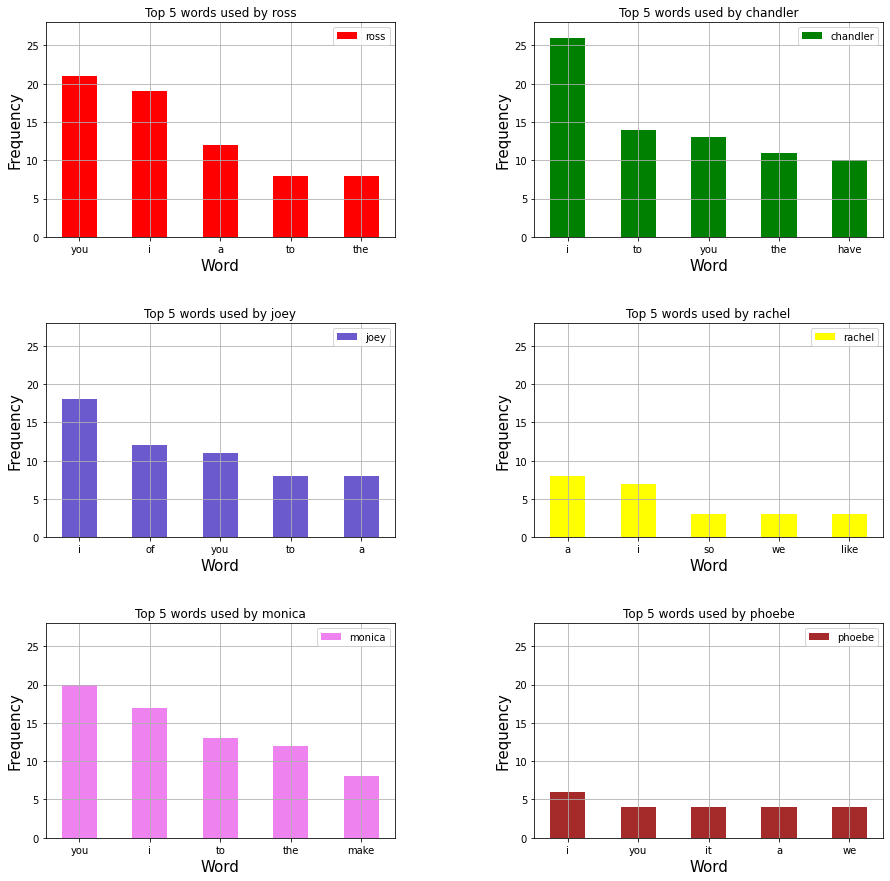

In [9]:
#Task 4
analyse2 = DialogueAnalysis("input_script.txt")
analyse2.plotGraph()